In [2]:
import numpy as np
import torch
# torch.set_default_device('cuda')
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from tqdm import tqdm
import time as tt

In [3]:
#Loading data
f_r_seq_100 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_seq_100.npy')
f_r_seq_150 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_seq_150.npy')
f_r_seq_200 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_seq_200.npy')
f_r_seq_250 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_seq_250.npy')
f_r_seq_300 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_seq_300.npy')
f_r_seq_500 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_seq_500.npy')
f_r_seq_1000 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_seq_1000.npy')

f_r_sta_100 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_sta_100.npy')
f_r_sta_150 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_sta_150.npy')
f_r_sta_200 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_sta_200.npy')
f_r_sta_250 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_sta_250.npy')
f_r_sta_300 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_sta_300.npy')
f_r_sta_500 = np.load(f'/Users/stefanopisoni/Documents/Work/Codes/MADRID_MPS_analysis/fluid_correlations/f_r_sta_500.npy')

In [3]:
f_r_u_x = np.load('/Users/stefanopisoni/NoSync/Statistics/f_r_u_x.npy')

/var/folders/78/3qnd64k56s5fxxztb82f1rcc0000gn/T/ipykernel_18103/3775379834.py:11: RuntimeWarning: divide by zero encountered in power
  power_law = 150*(x**(-5/3))


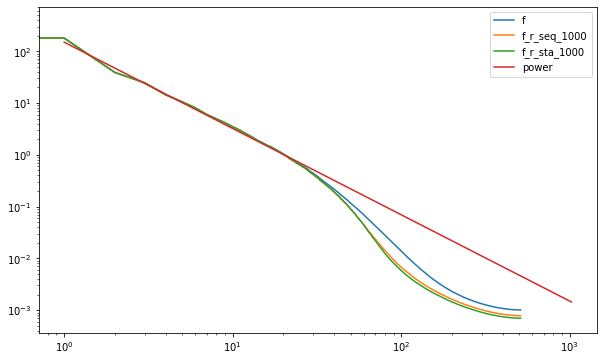

In [27]:
x = np.linspace(0,1024,1024)

# FT of f(r) from data
f = np.fft.rfftn(f_r_u_x)
# f_r_seq_100 = np.fft.rfftn(f_r_seq_100)
# f_r_seq_150 = np.fft.rfftn(f_r_seq_150)
fft_f_r_seq_1000 = np.fft.rfftn(f_r_seq_1000)
fft_f_r_sta_1000 = np.fft.rfftn(f_r_sta_1000)

# Theoretical power law for the Energy spectrum
power_law = 150*(x**(-5/3))


# PLOT
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(f, label='f')
# ax.plot(f_r_seq_100, label='f_r_seq_100')
# ax.plot(f_r_seq_150, label='f_r_seq_150')
ax.plot(fft_f_r_seq_1000, label='f_r_seq_1000')
ax.plot(fft_f_r_sta_1000, label='f_r_sta_1000')

ax.plot(power_law, label='power')
# ax.plot(exp_FT, label='exp_FT')
ax.set_xscale('log')
ax.set_yscale('log')
# plt.ylabel("")
plt.legend()

In [4]:
E_k_original = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_original.tens')

E_k_sta_100_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_100.tens')
E_k_sta_200_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_200.tens')
E_k_sta_500_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_500.tens')
E_k_sta_1000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_1000.tens')
E_k_sta_2000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_2000.tens')
E_k_sta_5000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_5000.tens')
E_k_sta_10000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_sta_10000.tens')

E_k_seq_100_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_100.tens')
E_k_seq_200_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_200.tens')
E_k_seq_500_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_500.tens')
E_k_seq_1000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_1000.tens')
E_k_seq_2000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_2000.tens')
E_k_seq_5000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_5000.tens')
E_k_seq_10000_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_10000.tens')

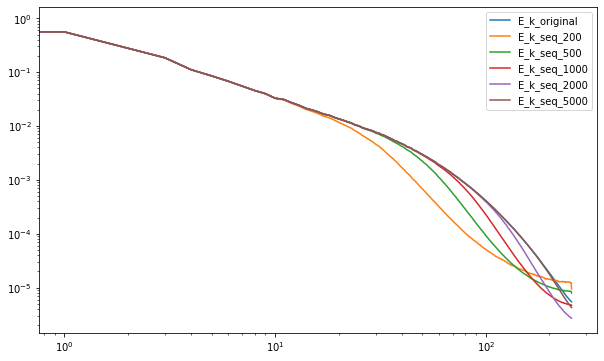

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(E_k_original, label='E_k_original')

# ax.plot(E_k_sta_100_tens, label='E_k_sta_100')
# ax.plot(E_k_sta_200_tens, label='E_k_sta_200')
# ax.plot(E_k_sta_500_tens, label='E_k_sta_500')
# ax.plot(E_k_sta_1000_tens, label='E_k_sta_1000')
# ax.plot(E_k_sta_2000_tens, label='E_k_sta_2000')
# ax.plot(E_k_sta_5000_tens, label='E_k_sta_5000')
# ax.plot(E_k_sta_10000_tens, label='E_k_sta_10000')

# ax.plot(E_k_seq_100_tens, label='E_k_seq_100')
ax.plot(E_k_seq_200_tens, label='E_k_seq_200')
ax.plot(E_k_seq_500_tens, label='E_k_seq_500')
ax.plot(E_k_seq_1000_tens, label='E_k_seq_1000')
ax.plot(E_k_seq_2000_tens, label='E_k_seq_2000')
ax.plot(E_k_seq_5000_tens, label='E_k_seq_5000')
# ax.plot(E_k_seq_10000_tens, label='E_k_seq_10000')
# ax.plot(np.fft.rfftn(f_r_sta_100), label='f_r_sta_100')

# x = np.linspace(0,1024,1024)
# power_law = 1.7*(x**(-5/3))
# ax.plot(power_law, label='power')

ax.set_xscale('log')
ax.set_yscale('log')
# plt.ylabel("")
plt.legend()